In [299]:
import numpy as np

# Question 1
A bank makes four kinds of loans to its customers and these loans yield the following annual interest rates to the bank:

* First mortgage 14% 
* Second mortgage 20%
* Home improvement 20% 
* Personal overdraft 10%

We are interested in the bank’s lending strategy. The information we know is as following:

1. In total $250 million is lent out.
2. First mortgages are 55% of all mortgages (i.e. first and second mortgage) issued.

3. Second mortgages are 25% of all loans issued.
4. The dollar-weighted average interest rate on all loans is 15%.

Calculate the lending strategy using matrix inversion.  How much is lent in home improvement loans?

 

Answer in millions of dollars, rounded to 2 decimal places.  If the answer is $23080444.12, then you should enter 23.08.

In [312]:
# the 4 equations in matrix format
A = np.zeros((4,4))
A[0,:] = [1,1,1,1] 
A[1,:] = [0.45,-0.55,0,0]
A[2,:] = [0,1,0,0]
A[3,:] = [0.14,0.2,0.2,0.1]

In [313]:
b = np.array([250,0,62.5, 37.5])

### Amount owed back for each loan

In [314]:
np.linalg.solve(A,b)

array([76.38888889, 62.5       , 31.94444444, 79.16666667])

### Interest check

In [214]:
76.38888889*.14+ 62.5*.2+ 31.94444444*.2+ 79.16666667*.1

37.4999999996

### Interest check lines up with total interest

In [343]:
250*.15

37.5

## Answer:
$31.94 million was lent in the home improvement loan.

# Question 2

Rankings are ubiquitous. You may have heard of Google’s PageRank and IMDB movie ratings. The backbone of these systems is Linear Algebra. We want to give you to taste of building your own ranking system to rank sports teams.

In a football league one is interested in modeling the ratings of teams based on the margin of victory and not just the outcomes, win/loss/draw. Consider the following data for five teams playing in such a league

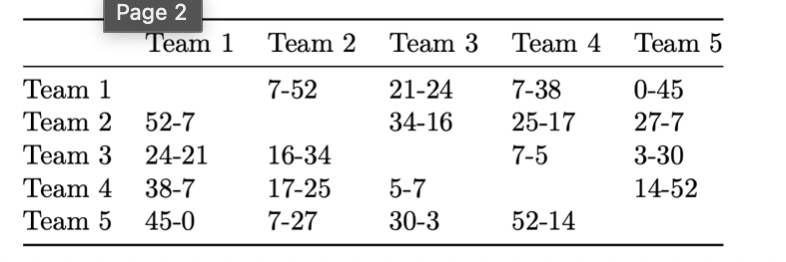

In [7]:
from IPython.display import Image
img = 'Optimiztion HW 1 Q 2.png'
Image(filename=img)

An entry (i, j) = (x-y) in this table represents a match between team i and team j where team i scored x points and team j scored y points. Our task is to first rate the teams and then convert the ratings to rankings.

Our goal is to find one number (the rating), ri,  for each team, so that when you compare the ratings between 2 teams, the difference in this rating is equal to the difference in points scored when those 2 teams played each other.  For example, team team 4 beat team 1 by a score of 38-7.  The point difference here is 31 points.  So if we compare team 4's rating to team 1's rating, r4 - r1 = 31.  This is not possible however because there are only 5 teams which leads to 5 values of r, and there were 10 games.  This means there are 5 unknowns and 10 equations, which is a system of equations that cannot be solved.  In this problem, our goal is to find the 5 unknowns that get as close as possible to satisfying the 10 equations!  To do this we will first pose the matrix equation with 5 unknowns and 10 equations and then use a trick from regression to find the closest answer possible.

 

We want

yk = ri − rj
Here yk is the difference in points scored by teams i, j in the match k and ri, rj are the ratings for teams i and j respectively. Assume N teams and M games.This won't be possible for every team/game, but the following steps will tell us how to find the best r's.

Part 1

Pose a matrix equation to solve for individual ratings of the form X r = y, the entries for coefficient matrix X represent the difference in ratings for the opponents in each game and y represents the difference in score of each game. Each row in X is a game between 2 teams.  This is the 5 unknown and 10 equation system.

Part 2

Typically the number of games is much greater than the number of teams, which means our system is overdetermined and we cannot solve the matrix equation by simply inverting the coefficient matrix. However, we can solve for approximate rating using least squares. Consider the normal equation for least squares of the form

$X^⊤X r = X^⊤ y$

If you don't know how to take matrix transpose in python, you can google it.
Let $M = X^⊤X$. We can interpret the diagonal elements of M as the number of games played by a team and the off diagonal elements of the matrix M as the negation of the number of games played by team i against team j. Similarly the jth entry for the RHS $p = X^⊤y$ is the sum of the difference in points for every game played by team j.
Use the information above to determine the entries for M and $X^⊤y$ in our new system.

Part 3

The matrix M is not invertible. So you cannot solve for ratings, r by inverting M. However, to make it invertible you can add a constraint. For simplicity let us assume that all our ratings add to 0.

Modify your matrix equation Mr = p to incorporate this constraint and get a new system  

$M_c r = p_c$.

To do this remove the last row in M and $(X^⊤ y)$ and replace it with an equation that guarantees all entries of r sum to 0.

Finally, solve for the ratings of the teams with data above and sort them to get team rankings.

 

Which team is the second best team?

In [328]:
# games played (10 equations), teams (5 unknowns)
A = np.zeros((10,5))
A[0,:] = [1,-1,0,0,0]
A[1,:] = [1,0,-1,0,0]
A[2,:] = [1,0,0,-1,0]
A[3,:] = [1,0,0,0,-1]
A[4,:] = [0,1,-1,0,0]
A[5,:] = [0,1,0,-1,0]
A[6,:] = [0,1,0,0,-1]
A[7,:] = [0,0,1,-1,0]
A[8,:] = [0,0,1,0,-1]
A[9,:] = [0,0,0,1,-1]

In [329]:
# how much the lower numberd team won by
# ex: team 1 lost by 45 to team 2 (first number in b)
b = np.array([-45,-3,-31,-45,18,8,20,2,-27,-38])
b

array([-45,  -3, -31, -45,  18,   8,  20,   2, -27, -38])

In [330]:
# part 2, transposing
At = np.zeros((5,10))
At = np.transpose(A) 
At @ A

array([[ 4., -1., -1., -1., -1.],
       [-1.,  4., -1., -1., -1.],
       [-1., -1.,  4., -1., -1.],
       [-1., -1., -1.,  4., -1.],
       [-1., -1., -1., -1.,  4.]])

In [332]:
# part 2, new names
M = At @ A
p = At @ b

In [333]:
# part 3, adding constraints
M[4,:] = [1,1,1,1,1]
p[4] = 0

In [334]:
p[4] = 0

In [336]:
np.linalg.solve(M,p)

array([-24.8,  18.2,  -8. ,  -3.4,  18. ])

## Team rankings:
1. Team 2 (18.2)
2. Team 5 (18.0)
3. Team 4 (-3.4)
4. Team 3 (-8.0)
5. Team 1 (-24.8)

# Question 3
A Lehmer matrix is one whose entries are specified by the following rule

Ai,j = i/j if j > i and Ai,j = j/i otherwise

Write a function named lehmer_entry which takes two arguments and outputs the value of the entry. Then use “for loop(s)” to generate a 20 by 20 Lehmer Matrix.

(Hint: First generate a 4 by 4 matrix with all the elements being 0. Then use for loop(s) and if statement to define the Lehmer matrix. Find the 4 by 4 Lehmer matrix and use the Wikipedia to check. Then you can change the code to run a 20 by 20)

Is A symmetric?

In [338]:
def lehmer_entry(x,y):
    A = np.zeros((20,20))
    for a in range(20):
        for b in range(20):
            if a > b:
                A[a,b] = (b+1)/(a+1)
            else:
                A[a,b] = (a+1)/(b+1)
    return(A)

A = lehmer_entry(4,4)
A

array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
        0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
        0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667,
        0.0625    , 0.05882353, 0.05555556, 0.05263158, 0.05      ],
       [0.5       , 1.        , 0.66666667, 0.5       , 0.4       ,
        0.33333333, 0.28571429, 0.25      , 0.22222222, 0.2       ,
        0.18181818, 0.16666667, 0.15384615, 0.14285714, 0.13333333,
        0.125     , 0.11764706, 0.11111111, 0.10526316, 0.1       ],
       [0.33333333, 0.66666667, 1.        , 0.75      , 0.6       ,
        0.5       , 0.42857143, 0.375     , 0.33333333, 0.3       ,
        0.27272727, 0.25      , 0.23076923, 0.21428571, 0.2       ,
        0.1875    , 0.17647059, 0.16666667, 0.15789474, 0.15      ],
       [0.25      , 0.5       , 0.75      , 1.        , 0.8       ,
        0.66666667, 0.57142857, 0.5       , 0.44444444, 0.4       ,
        0.36363636, 0.33333333, 0.30769231, 0

Yes, A is symmetric.

# Question 4

Going back to the Lehmer matrix problem.
 

Calculate the inverse of A and assign it to C.

Assign [1 2 3 4 5 6 7 8 9 10 10 9 8 7 6 5 4 3 2 1] to d.

Solve for x in the equation Ax = Cd

What is $x_{10}$ ? Round to 1 decimal place.  Be careful if the answer you get is in scientific notation.

In [339]:
# inverse of A
C = np.linalg.inv(A)

In [193]:
d = ([1,2,3,4,5,6,7,8,9,10,10,9,8,7,6,5,4,3,2,1])

In [340]:
# multiplcation of C*d (done d*c due to matrix rules)
e = np.matmul(d,C)

In [341]:
np.linalg.solve(A,e)

array([-1.77635684e-15, -1.06581410e-15,  8.45038325e-15, -1.93989445e-14,
        1.76738534e-14, -5.40360297e-15,  6.00363064e-14, -2.65269288e-14,
       -2.48120301e+01,  2.00642393e+01,  3.58137507e+01, -3.00626280e+01,
       -3.73699570e-04, -2.77204399e-04, -2.09968770e-04, -1.61954093e-04,
       -1.26922826e-04, -1.00877938e-04,  9.50593309e+01, -1.00062903e+02])

In [342]:
# Converting the answer to non-scientific notation
2.00642393e+01

20.0642393

For $Ax = Cd$, x = 20.1 when rounded to 1 decimal place.